# Notebook 01: Problem Statement & Exploratory Data Analysis

**Student Name:** Erick Lanford

**Dataset:** Md Vessel jobs

**Checkpoints:**
- Checkpoint 1 (Due Feb 1): Sections 1-3
- Checkpoint 2 (Due Feb 8): Sections 4-6

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before each checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll see text cells asking you to explain your decisions, observations, and reasoning. **These written reflections are a critical part of your grade.** 

Don't just write one-word answers or skip these sections. Your reflections demonstrate:
- Your understanding of the data science process
- Your ability to communicate findings to stakeholders
- Your critical thinking about data quality and feature importance

Take time to write thoughtful, complete responses. This is what separates a good data scientist from someone who just runs code!

---

## Setup

Run this cell first to import all necessary libraries.

In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---

# CHECKPOINT 1 (Due: Feb 1)

---

## Section 1: Problem Statement

### 1.1 What are you trying to predict?

*Clearly state your target variable and what it represents.*

**Your answer:**

We are trying to predict how much time , in hours, it will take Maryland pilots to move a vessel from point A to point B. The target variable is "DurationHours", which represents the total duration of the transit in hours.

---

### 1.2 Why does this prediction matter?

*Who would care about this prediction? What decisions could be made with it?*

**Your answer:**

This prediction matters to Maryland pilots who need to efficiently schedule vessel movements. Accurate predictions of transit duration can help optimize resource allocation, reduce waiting times, and improve overall operational efficiency.

---

### 1.3 What features might help predict the target?

*Based on your intuition and domain knowledge, what columns do you think will be most important?*

**Your answer:**

Potential features that might help predict the target include vessel characteristics (such as size, type, and cargo) and weather conditions, tide levels.

## Section 2: Dataset Overview

### 2.1 Load Your Data

In [3]:
# Load your dataset
# Update the path to match your file name
df = pd.read_csv('../data/raw/md_data_test_2024.csv')

# Display basic info
print(f"Dataset shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())

Dataset shape: 4,774 rows, 16 columns

Column names:
['VesselTypeREF', 'Propulsion', 'Length', 'Depth', 'Draught', 'StartDate', 'CompletionDate', 'StartLocationREF', 'StartBerthREF', 'EndLocationREF', 'EndBerthREF', 'DraftNumeric', 'AirDraftNumeric', 'MConcernREF', 'Direction', 'DurationMinutes']


In [4]:
# TODO: View the first 5 rows of your dataframe
#
# Hint: Use .head()

# YOUR CODE HERE:
df.head(5)

,VesselTypeREF,Propulsion,Length,Depth,Draught,StartDate,CompletionDate,StartLocationREF,StartBerthREF,EndLocationREF,EndBerthREF,DraftNumeric,AirDraftNumeric,MConcernREF,Direction,DurationMinutes
0,100,Oil Engine(s) Direct Drive,177.0,14.35,10.03,2024-01-20 07:34:00,2024-01-20 19:45:00,2,0,4,0,29.41667,0.0,0,NORTH,731
1,100,Oil Engine(s) Direct Drive,177.0,14.35,10.03,2024-01-23 09:18:00,2024-01-23 11:45:00,4,0,1,152,29.41667,0.0,0,TRANSFER,147
2,100,Oil Engine(s) Direct Drive,177.0,14.35,10.03,2024-01-23 18:00:00,2024-01-23 19:15:00,1,152,1,47,29.41667,0.0,0,SHIFT,75
3,100,Oil Engine(s) Direct Drive,177.0,14.35,10.03,2024-01-24 19:30:00,2024-01-25 09:06:00,1,47,2,0,28.91667,0.0,0,SOUTH,816
4,125,Oil Engine(s) Direct Drive,225.0,19.90,14.38,2024-01-29 09:33:00,2024-01-29 20:15:00,2,0,4,0,25.26247,0.0,0,NORTH,642


In [5]:
# TODO: View the last 5 rows of your dataframe
#
# Hint: Use .tail()

# YOUR CODE HERE:
df.tail(5)

,VesselTypeREF,Propulsion,Length,Depth,Draught,StartDate,CompletionDate,StartLocationREF,StartBerthREF,EndLocationREF,EndBerthREF,DraftNumeric,AirDraftNumeric,MConcernREF,Direction,DurationMinutes
4769,125,Oil Engine(s) Direct Drive,292.0,24.55,18.18,2024-11-06 16:36:00,2024-11-07 07:30:00,2,0,1,301,37.58333,0.0,0,NORTH,894
4770,125,Oil Engine(s) Direct Drive,292.0,24.55,18.18,2024-11-07 20:30:00,2024-11-07 21:35:00,1,301,1,101,39.00000,0.0,0,SHIFT,65
4771,125,Oil Engine(s) Direct Drive,292.0,24.55,18.18,2024-11-10 13:12:00,2024-11-11 05:13:00,1,101,2,0,47.50656,0.0,0,SOUTH,961
4772,157,Oil Engine(s) Direct Drive,296.0,22.95,11.50,2024-11-08 08:00:00,2024-11-08 18:30:00,2,0,1,36,31.49606,0.0,0,NORTH,630
4773,157,Oil Engine(s) Direct Drive,296.0,22.95,11.50,2024-11-10 17:06:00,2024-11-11 03:18:00,1,42,2,0,31.16798,0.0,0,SOUTH,612


### 2.2 Data Types and Info

In [6]:
# TODO: Display info about your dataframe (data types, non-null counts)
#
# Hint: Use .info()

# YOUR CODE HERE:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4774 entries, 0 to 4773
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   VesselTypeREF     4774 non-null   int64  
 1   Propulsion        4749 non-null   object 
 2   Length            4774 non-null   float64
 3   Depth             4774 non-null   float64
 4   Draught           4774 non-null   float64
 5   StartDate         4774 non-null   object 
 6   CompletionDate    4774 non-null   object 
 7   StartLocationREF  4774 non-null   int64  
 8   StartBerthREF     4774 non-null   int64  
 9   EndLocationREF    4774 non-null   int64  
 10  EndBerthREF       4774 non-null   int64  
 11  DraftNumeric      4774 non-null   float64
 12  AirDraftNumeric   4774 non-null   float64
 13  MConcernREF       4774 non-null   int64  
 14  Direction         4774 non-null   object 
 15  DurationMinutes   4774 non-null   int64  
dtypes: float64(5), int64(7), object(4)
memory 

In [7]:
# TODO: Get summary statistics for numerical columns
#
# Hint: Use .describe()

# YOUR CODE HERE:
df.describe()


,VesselTypeREF,Length,Depth,Draught,StartLocationREF,StartBerthREF,EndLocationREF,EndBerthREF,DraftNumeric,AirDraftNumeric,MConcernREF,DurationMinutes
count,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000
mean,213.192501,222.685677,22.444244,11.710352,1.925848,38.968580,2.016967,39.181190,30.420939,20.435613,12.376204,521.162338
std,101.398732,55.459445,7.923321,2.741240,1.340887,55.390077,1.768478,55.659496,6.917661,48.484753,41.858061,247.567510
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,9.666670,0.000000,0.000000,30.000000
25%,125.000000,189.990000,16.400000,9.820000,1.000000,0.000000,1.000000,0.000000,26.000000,0.000000,0.000000,299.000000
50%,155.000000,211.000000,20.200000,11.300000,2.000000,0.000000,2.000000,0.000000,29.250000,0.000000,0.000000,586.000000
75%,364.000000,262.050000,27.000000,14.000000,2.000000,60.000000,2.000000,60.000000,33.382545,0.000000,0.000000,670.000000
max,378.000000,368.990000,40.400000,18.620000,18.000000,303.000000,18.000000,303.000000,47.507000,182.500000,192.000000,2067.000000


In [8]:
# TODO: Get summary statistics for categorical columns
#
# Hint: Use .describe(include='object')

# YOUR CODE HERE:
df.describe(include='object')


,Propulsion,StartDate,CompletionDate,Direction
count,4749,4774,4774,4774
unique,8,4687,4686,6
top,Oil Engine(s) Direct Drive,2024-09-06 16:00:00,2024-09-05 18:00:00,NORTH
freq,4114,3,3,1707


### 2.3 Dataset Description

*After looking at the data above, describe your dataset in your own words.*

**Questions to answer:**
- Where did this data come from? (Kaggle link, source)
- What does each row represent?
- How many features do you have?
- What types of features do you have? (numerical, categorical)

**Your description:**

We get the data from the Maryland Pilots database. 
Each row represents a vessel transit event piloted by Maryland pilots.
The dataset contains 12 features.
The features include both numerical (e.g., DurationHours, Draught, DraftNumeric) and categorical (e.g., VesselType, CargoType) data types.

## Section 3: Initial EDA

### 3.1 Target Variable Analysis

In [9]:
# Define your target variable
TARGET = 'DurationMinutes'  # <-- UPDATE THIS!

# Basic statistics of target
print(f"Target Variable: {TARGET}")
print(f"\nBasic Statistics:")
print(df[TARGET].describe())

Target Variable: DurationMinutes

Basic Statistics:
count    4774.000000
mean      521.162338
std       247.567510
min        30.000000
25%       299.000000
50%       586.000000
75%       670.000000
max      2067.000000
Name: DurationMinutes, dtype: float64


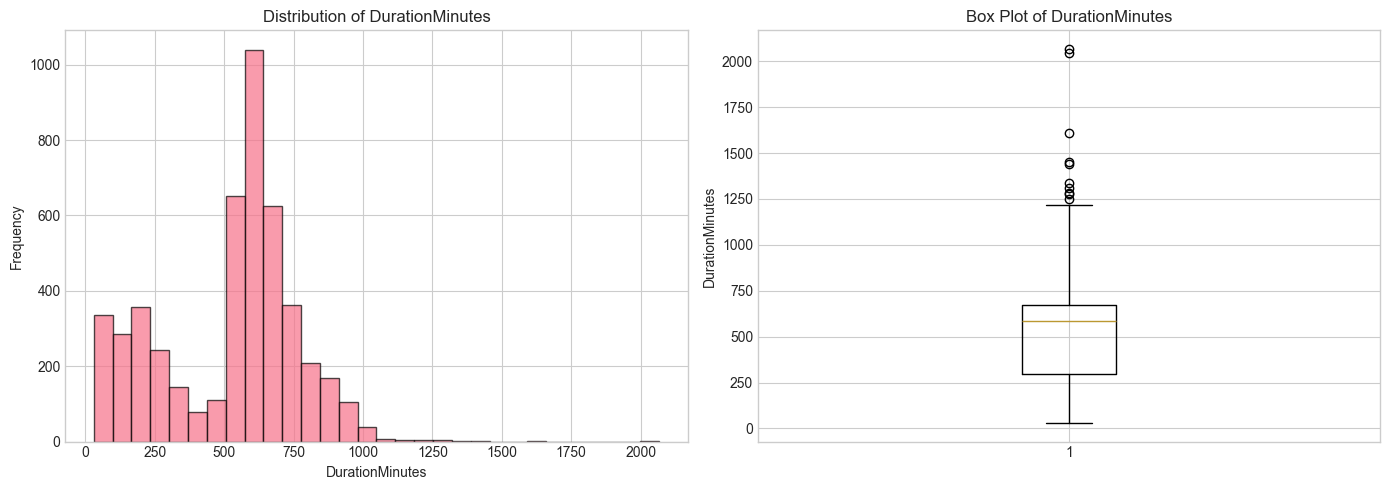


Skewness: -0.25
→ Target is approximately symmetric.


In [10]:
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[TARGET].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel(TARGET)
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of {TARGET}')

# Box plot
axes[1].boxplot(df[TARGET].dropna())
axes[1].set_ylabel(TARGET)
axes[1].set_title(f'Box Plot of {TARGET}')

plt.tight_layout()
plt.show()

# Check skewness
skewness = df[TARGET].skew()
print(f"\nSkewness: {skewness:.2f}")
if abs(skewness) > 1:
    print("→ Target is highly skewed. Consider log transform in feature engineering.")
elif abs(skewness) > 0.5:
    print("→ Target is moderately skewed.")
else:
    print("→ Target is approximately symmetric.")

### 3.2 Data Quality Checks

In [11]:
# TODO: Check for duplicate rows in your dataframe
#
# Steps:
# 1. Count how many duplicate rows exist using df.duplicated().sum()
# 2. Print the count and the percentage of duplicates
#
# Expected output format:
# "Duplicate rows: X,XXX (X.XX%)"

# YOUR CODE HERE:
duplicate_rows = df.duplicated().sum()
percentage_duplicates = (duplicate_rows / len(df)) * 100
print(f"Duplicate rows: {duplicate_rows:,} ({percentage_duplicates:.2f}%)")

Duplicate rows: 0 (0.00%)


In [12]:
# TODO: Create a summary of missing values
#
# Steps:
# 1. Calculate missing count for each column: df.isnull().sum()
# 2. Calculate missing percentage: (df.isnull().sum() / len(df)) * 100
# 3. Create a DataFrame with 'Missing Count' and 'Missing %' columns
# 4. Sort by 'Missing %' descending
# 5. Display only columns that have missing values
#
# Hint: You can create a DataFrame with pd.DataFrame({'col1': series1, 'col2': series2})

# YOUR CODE HERE:
missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing %': missing_percentage})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)


print("Columns that have missing values:")
print(missing_df)


Columns that have missing values:
            Missing Count  Missing %
Propulsion             25    0.52367


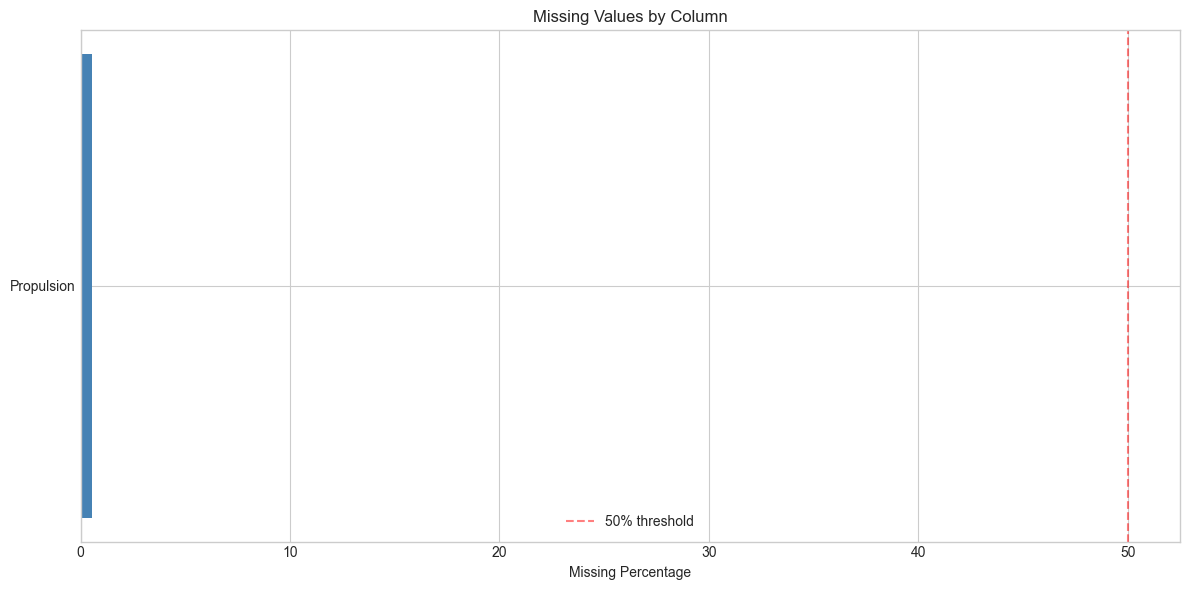

In [13]:
# Visualize missing values (if any)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    colors = ['red' if pct > 50 else 'orange' if pct > 20 else 'steelblue' 
              for pct in missing_cols['Missing %']]
    plt.barh(missing_cols.index, missing_cols['Missing %'], color=colors)
    plt.xlabel('Missing Percentage')
    plt.title('Missing Values by Column')
    plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Recommendation
    high_missing = missing_cols[missing_cols['Missing %'] > 50]
    if len(high_missing) > 0:
        print(f"\n⚠️ Columns with >50% missing (consider dropping): {high_missing.index.tolist()}")
else:
    print("✓ No missing values in the dataset!")

### 3.3 Initial Observations

*Based on your initial exploration, what do you notice?*

**Questions to consider:**
- Is your target variable normally distributed or skewed?
- Are there any obvious outliers in the target?
- How much missing data do you have to deal with?
- Are there any duplicate rows?
- Any surprises or interesting findings?

**Your observations:**

Trip duration its skewed, but not normally distributed. Most of the values are close to the 400-800 min range.
There are some outliers, especially above ~1200 minutes.
There are small amounts of missing data in the "Propulsion" column (~0.5%) and also almost none duplicate rows (<0.1%).
An interesting finding is that trip duration median is around 600 minutes, which may indicate that most trips are relatively short, still more than 8 hours.


---

## ✅ Checkpoint 1 Submission Instructions

**Congratulations!** You've completed Checkpoint 1. Before moving on, let's commit your work and submit.

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub
Open your terminal and run these commands:

```bash
# Navigate to your project folder (if not already there)
cd path/to/your/capstone-project

# Stage your notebook and data
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/raw/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 1: Problem statement and initial EDA"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 1 assignment on Canvas
2. Submit the link to your GitHub repository
3. Make sure your repo shows your latest commit!

### Step 4: Continue to Checkpoint 2
Now proceed to **Section 4** below to continue with your complete EDA, data cleaning, and feature engineering.

---

---

# CHECKPOINT 2 (Due: Feb 8)

---

## Section 4: Complete EDA

### 4.1 Numerical Features Analysis

In [14]:
# TODO: Get a list of numerical columns (excluding the target)
#
# Steps:
# 1. Use df.select_dtypes(include=[np.number]) to get numerical columns
# 2. Get the column names as a list with .columns.tolist()
# 3. Remove TARGET from the list if it's in there
# 4. Print the count and list of numerical features
#
# Store result in: numerical_cols

# YOUR CODE HERE:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

numerical_categorical_cols = ['VesselTypeREF', 'StartLocationREF', 'StartBerthREF', 'EndLocationREF', 'EndBerthREF', 'MConcernREF']

# Remove numerical_categorical_cols from numerical columns
numerical_cols = [col for col in numerical_cols if col not in numerical_categorical_cols]

numerical_cols.remove(TARGET)
print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")


Numerical features (5): ['Length', 'Depth', 'Draught', 'DraftNumeric', 'AirDraftNumeric']


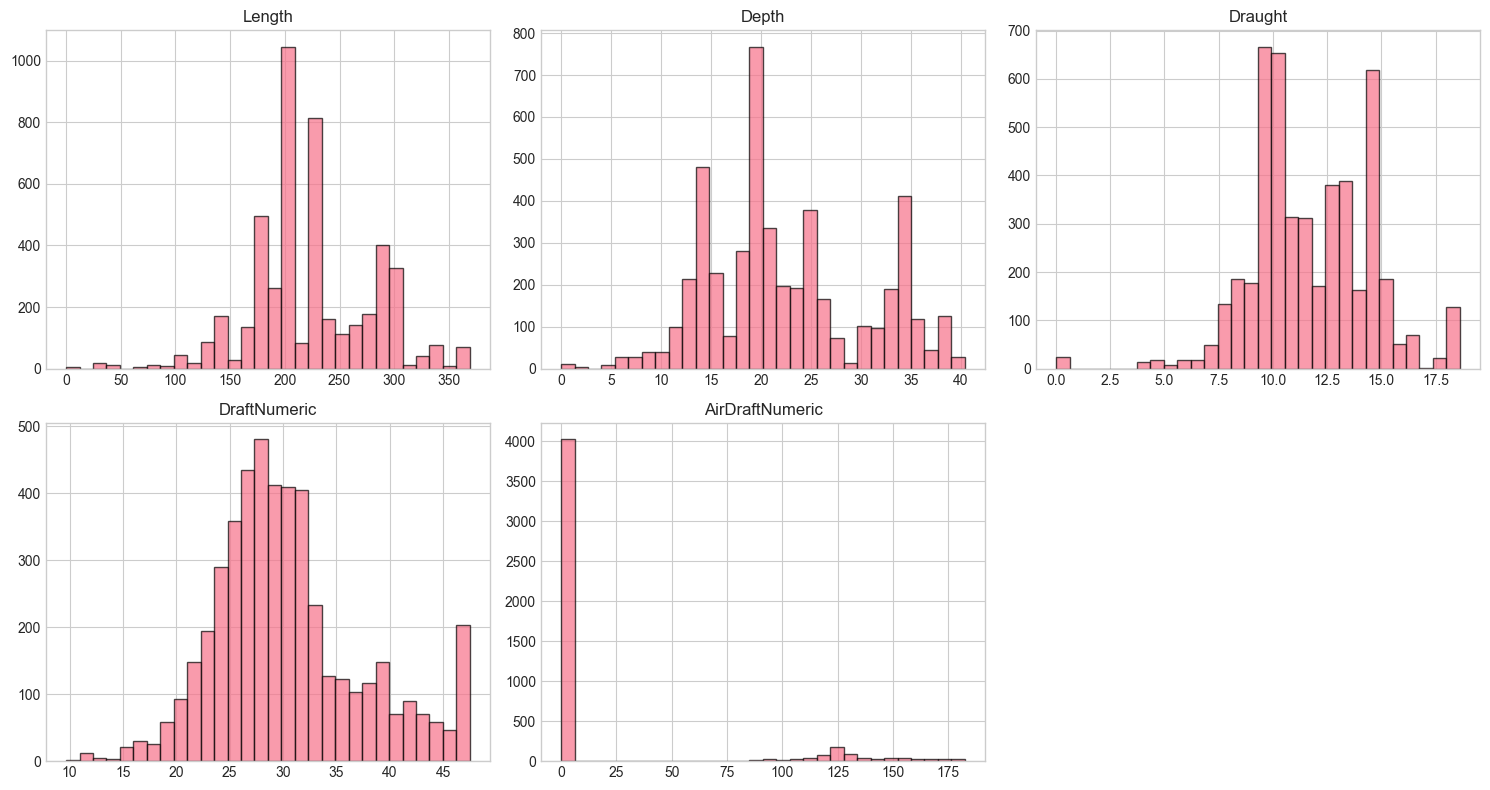

In [15]:
# Distribution of numerical features
if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel('')

    # Hide empty subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found (besides target).")

### 4.2 Categorical Features Analysis

In [16]:
# TODO: Get a list of categorical columns and explore their values
#
# Steps:
# 1. Use df.select_dtypes(include=['object', 'category']) to get categorical columns
# 2. Get the column names as a list
# 3. Print the count and list of categorical features
# 4. For each categorical column, print:
#    - Number of unique values: df[col].nunique()
#    - Top 10 value counts: df[col].value_counts().head(10)
#
# Store result in: categorical_cols

# YOUR CODE HERE:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# add numerical_categorical_cols to categorical_cols
categorical_cols += numerical_categorical_cols

print(f"Categorical columns: ({len(categorical_cols)}): {categorical_cols}")

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Top 10 value counts:\n{df[col].value_counts().head(10)}")

Categorical columns: (10): ['Propulsion', 'StartDate', 'CompletionDate', 'Direction', 'VesselTypeREF', 'StartLocationREF', 'StartBerthREF', 'EndLocationREF', 'EndBerthREF', 'MConcernREF']

Column: Propulsion
Number of unique values: 8
Top 10 value counts:
Propulsion
Oil Engine(s) Direct Drive       4114
Oil Engine(s) Geared Drive        347
Oil Engine(s) Electric Drive      261
Sail Aux Oil Eng(s) Geared         11
Steam Turbine(s) Geared Drive       9
Sail Aux Oil Eng(s) Direct-Dr       3
Gas Turbine(s) Geared Drive         2
Oil Engines Elec. & Geared Dr       2
Name: count, dtype: int64

Column: StartDate
Number of unique values: 4687
Top 10 value counts:
StartDate
2024-09-06 16:00:00    3
2024-10-20 17:00:00    3
2024-03-17 17:00:00    3
2024-02-08 15:00:00    3
2024-03-17 16:00:00    2
2024-10-03 20:30:00    2
2024-10-28 10:00:00    2
2024-02-21 20:30:00    2
2024-01-06 16:30:00    2
2024-03-09 18:30:00    2
Name: count, dtype: int64

Column: CompletionDate
Number of unique values

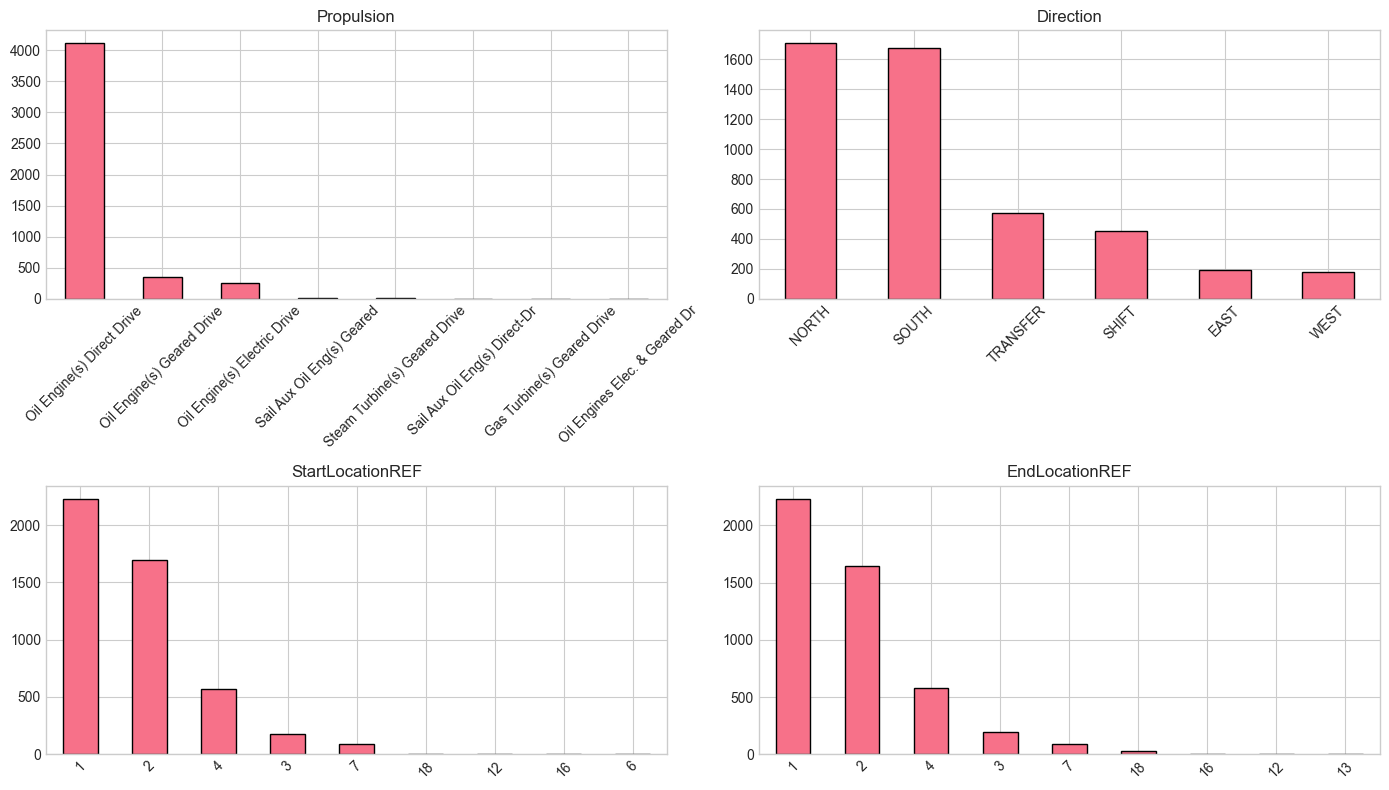

In [17]:
# Visualize categorical features (for columns with reasonable number of categories)
cat_cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 10]

if cat_cols_to_plot:
    n_cols = 2
    n_rows = (len(cat_cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if len(cat_cols_to_plot) == 1 else axes
    
    for i, col in enumerate(cat_cols_to_plot):
        df[col].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for j in range(len(cat_cols_to_plot), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns with ≤10 unique values to plot.")

### 4.3 Categorical Features vs Target

*How does the target variable differ across categories?*

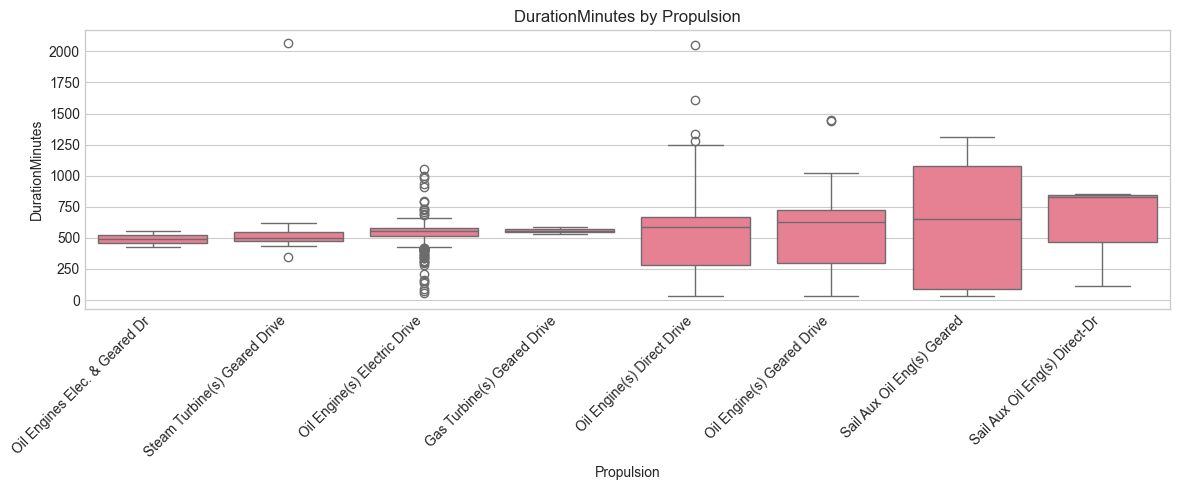


Mean DurationMinutes by Propulsion:
                                     mean  median  count
Propulsion                                              
Steam Turbine(s) Geared Drive  669.777778   498.0      9
Sail Aux Oil Eng(s) Geared     606.454545   650.0     11
Sail Aux Oil Eng(s) Direct-Dr  597.666667   831.0      3
Gas Turbine(s) Geared Drive    558.000000   558.0      2
Oil Engine(s) Electric Drive   534.007663   552.0    261
Oil Engine(s) Geared Drive     532.743516   630.0    347
Oil Engine(s) Direct Drive     518.351240   590.0   4114
Oil Engines Elec. & Geared Dr  491.000000   491.0      2



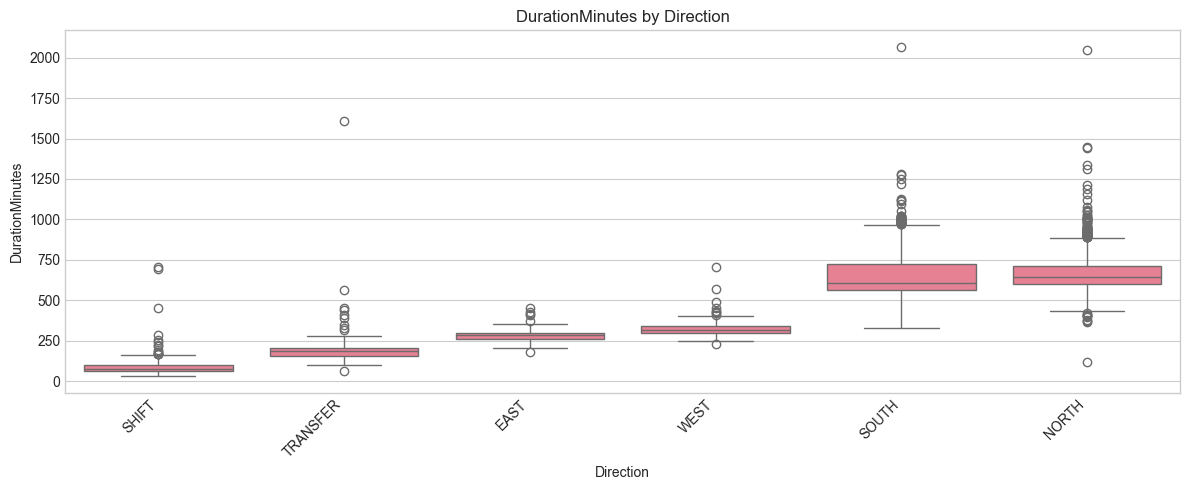


Mean DurationMinutes by Direction:
                 mean  median  count
Direction                           
NORTH      664.349736   642.0   1707
SOUTH      653.449284   608.0   1676
WEST       325.223464   317.0    179
EAST       281.586387   283.0    191
TRANSFER   187.977193   185.0    570
SHIFT       87.933481    75.0    451



In [18]:
# Box plots: Target by categorical features
cat_cols_to_analyze = [col for col in categorical_cols if df[col].nunique() <= 8]

if cat_cols_to_analyze:
    for col in cat_cols_to_analyze[:4]:  # Limit to first 4 for readability
        plt.figure(figsize=(12, 5))
        
        # Order by median target value
        order = df.groupby(col)[TARGET].median().sort_values().index
        
        sns.boxplot(data=df, x=col, y=TARGET, order=order)
        plt.title(f'{TARGET} by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Show mean target by category
        print(f"\nMean {TARGET} by {col}:")
        print(df.groupby(col)[TARGET].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))
        print("\n" + "="*50)
else:
    print("No suitable categorical columns for this analysis.")

### 4.4 Correlation Analysis

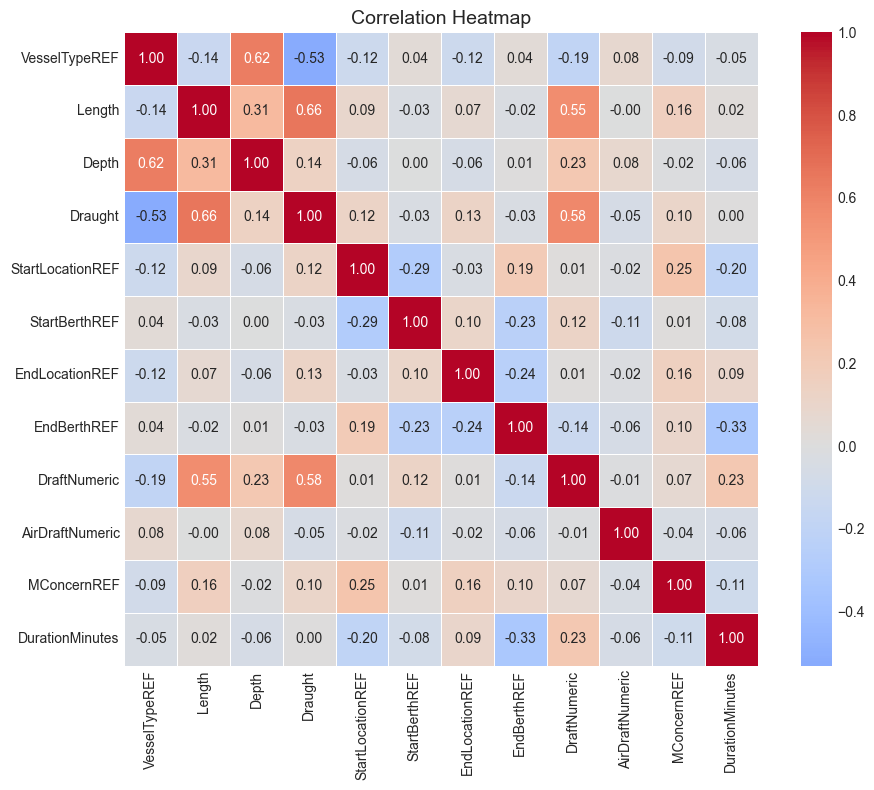

In [19]:
# TODO: Create and visualize a correlation matrix
#
# Steps:
# 1. Create a list of columns: numerical_cols + [TARGET]
# 2. Calculate the correlation matrix: df[columns].corr()
# 3. Create a heatmap using sns.heatmap()
#
# Heatmap parameters to use:
# - annot=True (show numbers)
# - cmap='coolwarm' (color scheme)
# - center=0 (center colormap at 0)
# - fmt='.2f' (2 decimal places)
#
# Store the correlation matrix in: correlation_matrix

# YOUR CODE HERE:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Red = positive, Blue = negative
            center=0,             # Center the colormap at 0
            fmt='.2f',            # 2 decimal places
            square=True,          # Make cells square
            linewidths=0.5)       # Add grid lines

plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

In [20]:
# TODO: Extract and analyze correlations with the target variable
#
# Steps:
# 1. Get the TARGET column from correlation_matrix
# 2. Drop the TARGET's correlation with itself (it's always 1.0)
# 3. Sort values in descending order
# 4. Print the correlations
# 5. Identify strong correlations (absolute value > 0.5)
#
# Store result in: target_correlations

# YOUR CODE HERE:
#remove TARGET column

target_correlations = correlation_matrix[TARGET].drop(labels=[TARGET]).sort_values(ascending=False)

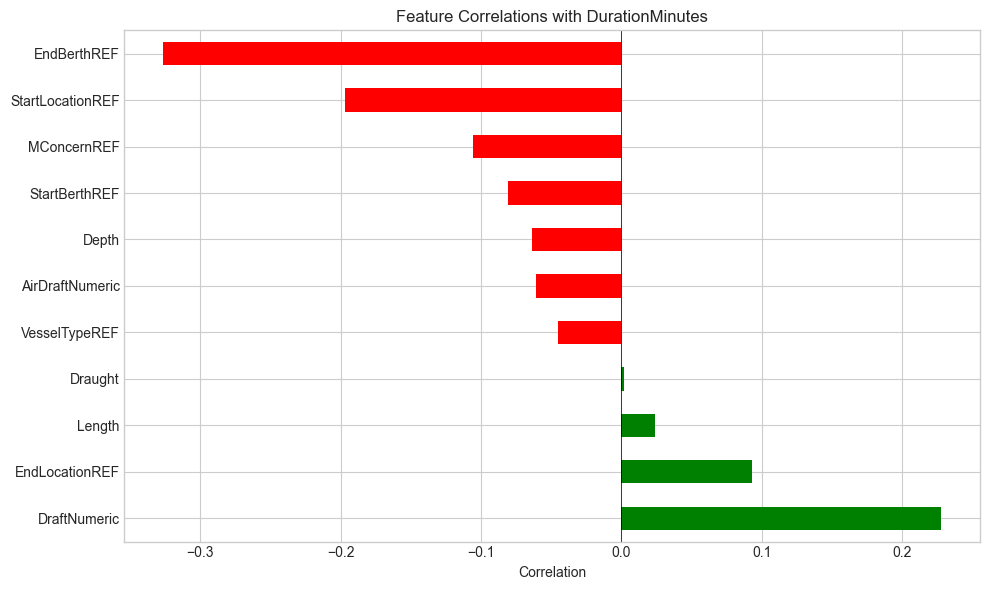

In [21]:
# Visualize correlations with target
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in target_correlations]
target_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation')
plt.title(f'Feature Correlations with {TARGET}')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### 4.5 Feature vs Target Relationships

*Create scatter plots for your most promising numerical features against the target.*

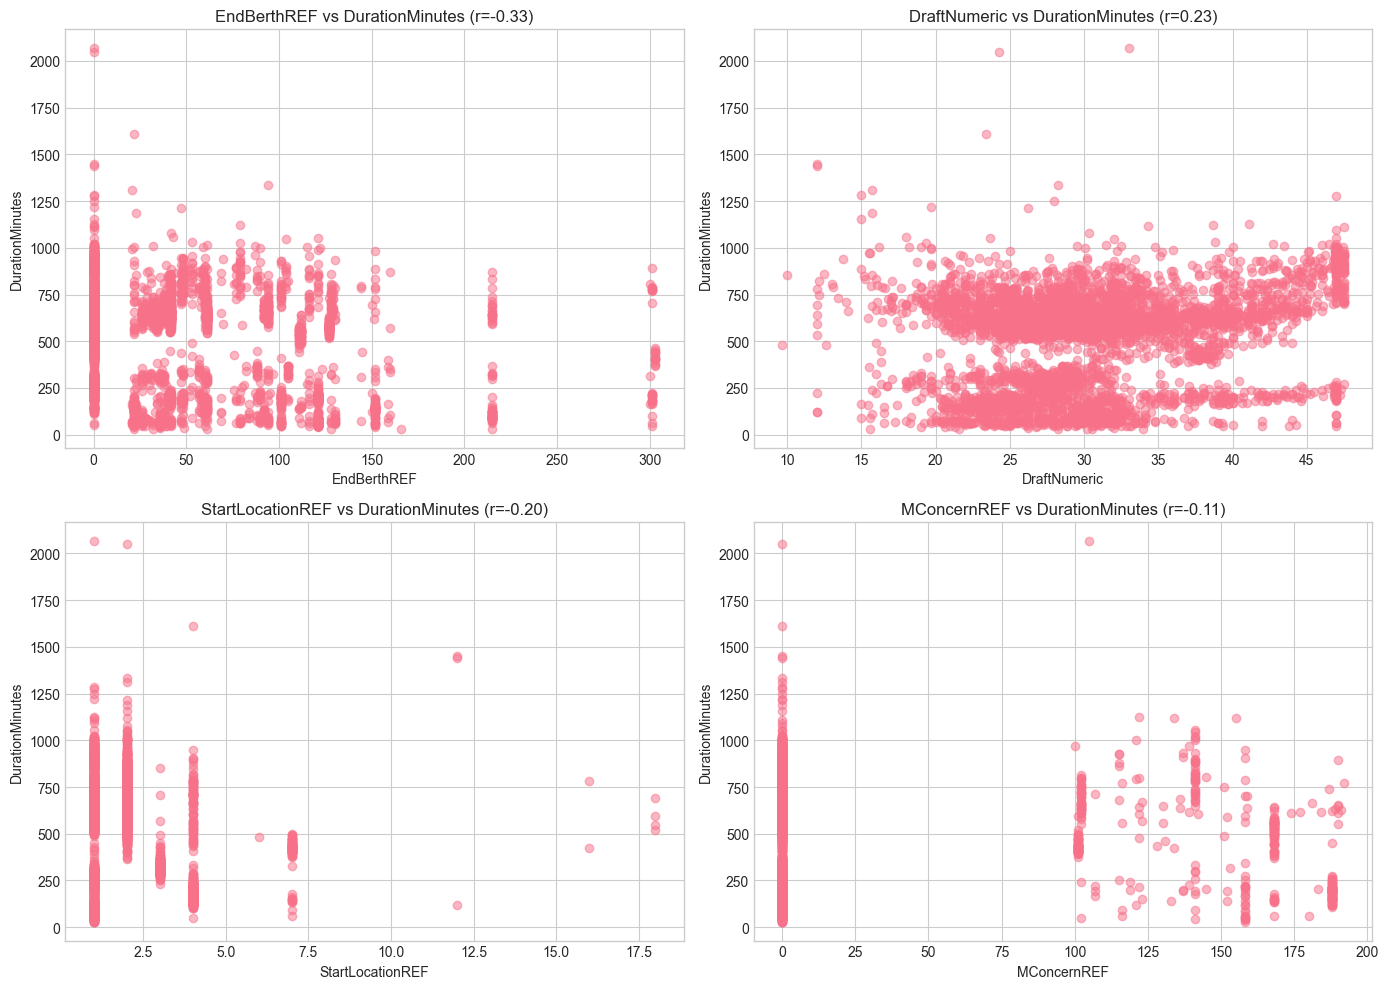

In [22]:
# Select top correlated features to plot
top_features = target_correlations.abs().sort_values(ascending=False).head(4).index.tolist()

if len(top_features) > 0:
    n_features = min(4, len(top_features))
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, feature in enumerate(top_features[:n_features]):
        axes[i].scatter(df[feature], df[TARGET], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(TARGET)
        corr = df[feature].corr(df[TARGET])
        axes[i].set_title(f'{feature} vs {TARGET} (r={corr:.2f})')

    # Hide unused subplots
    for j in range(n_features, 4):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features to plot.")

### 4.6 Additional Exploration (Your Choice!)

The sections above provide a foundation, but every dataset is unique. Use the cells below to explore additional aspects of YOUR data that you think are important.

**Ideas for additional exploration:**
- Violin plots for categorical vs target (shows distribution shape)
- Look at feature interactions (e.g., does the relationship between X and Y change based on Z?)
- Explore geographic patterns (if you have location data)
- Create pair plots for key features (`sns.pairplot()`)
- Analyze distributions across different subgroups
- Look for data quality issues specific to your dataset
- Check for nonsensical values (negative prices, impossible ages, etc.)

**Remember:** The best insights often come from curiosity-driven exploration, not just following a template. What questions do YOU have about your data?

In [23]:
import re

# Function to sanitize column names
def safe_col(s):
    return re.sub(r"[^0-9a-zA-Z_]+", "_", str(s)).strip("_")

In [24]:
# YOUR ADDITIONAL EDA CODE HERE
# Add as many cells as you need - don't be limited by this template!
# Adding Noaa (National Oceanic and Atmospheric Administration) data

df_noaa_water_levels = pd.read_csv('../data/raw/noaa_water_levels_2024.csv', parse_dates=['t'])
df_noaa_currents = pd.read_csv('../data/raw/noaa_currents_2024.csv', parse_dates=['t'])

# create a copy of the original data
df_with_noaa = df.copy()

# 
df_with_noaa["StartDateUTC"] = pd.to_datetime(df_with_noaa["StartDate"], utc=True)
df_with_noaa = df_with_noaa.sort_values("StartDateUTC")


In [25]:

# populate water levels
for station in df_noaa_water_levels["Station"].unique():
    df_station = df_noaa_water_levels[df_noaa_water_levels["Station"] == station].copy()
    df_station["t"] = pd.to_datetime(df_station["t"], utc=True)
    df_station = df_station.sort_values("t")

    col = f"WL_{safe_col(station)}"
    tmp = pd.merge_asof(
        df_with_noaa[["StartDateUTC"]],
        df_station[["t","v", "s", "f"]],
        left_on="StartDateUTC",
        right_on="t",
        direction="nearest",
        tolerance=pd.Timedelta("30min"),
    ).rename(columns={"v": col, "s": f"{col}_speed", "f": f"{col}_flag"})

    df_with_noaa[col] = tmp[col].values
    df_with_noaa[f"{col}_speed"] = tmp[f"{col}_speed"].values
    df_with_noaa[f"{col}_flag"] = tmp[f"{col}_flag"].values


In [26]:
# count nulls in water level columns
wl_cols = [col for col in df_with_noaa.columns if col.startswith("WL_")]
print("Null counts in water level columns:")

for col in wl_cols:
    null_count = df_with_noaa[col].isnull().sum()
    print(f"{col}: {null_count} nulls")

Null counts in water level columns:
WL_CBBT_Chesapeake_Channel_VA: 0 nulls
WL_CBBT_Chesapeake_Channel_VA_speed: 0 nulls
WL_CBBT_Chesapeake_Channel_VA_flag: 0 nulls
WL_Windmill_Point_VA: 0 nulls
WL_Windmill_Point_VA_speed: 0 nulls
WL_Windmill_Point_VA_flag: 0 nulls
WL_Annapolis_MD: 0 nulls
WL_Annapolis_MD_speed: 0 nulls
WL_Annapolis_MD_flag: 0 nulls


In [27]:
# populate currents
for station in df_noaa_currents["Station"].unique():
    
    # skip Henrys as the data is unreliable
    if station == "Cape Henry LB 2CH":
        continue
    
    df_station = df_noaa_currents[df_noaa_currents["Station"] == station].copy()
    df_station["t"] = pd.to_datetime(df_station["t"], utc=True)
    df_station = df_station.sort_values("t")

    col = f"CUR_{safe_col(station)}"
    tmp = pd.merge_asof(
        df_with_noaa[["StartDateUTC"]],
        df_station[["t","s", "d", "b"]],
        left_on="StartDateUTC",
        right_on="t",
        direction="nearest",
        tolerance=pd.Timedelta("10min"),
    )

    df_with_noaa[f"{col}_speed"] = tmp["s"].values
    df_with_noaa[f"{col}_direction"] = tmp["d"].values
    # df_with_noaa[f"{col}_bias"] = tmp["b"].values

In [28]:
# count nulls in current columns
cur_cols = [col for col in df_with_noaa.columns if col.startswith("CUR_")]
print("Null counts in current columns:")

for col in cur_cols:
    null_count = df_with_noaa[col].isnull().sum()
    print(f"{col}: {null_count} nulls")

Null counts in current columns:
CUR_Rappahannock_Shoal_Channel_speed: 58 nulls
CUR_Rappahannock_Shoal_Channel_direction: 58 nulls
CUR_York_Spit_LB_22_speed: 4 nulls
CUR_York_Spit_LB_22_direction: 4 nulls
CUR_Chesapeake_City_speed: 26 nulls
CUR_Chesapeake_City_direction: 26 nulls


In [29]:
df_with_noaa.describe()

,VesselTypeREF,Length,Depth,Draught,StartLocationREF,StartBerthREF,EndLocationREF,EndBerthREF,DraftNumeric,AirDraftNumeric,MConcernREF,DurationMinutes,WL_CBBT_Chesapeake_Channel_VA,WL_CBBT_Chesapeake_Channel_VA_speed,WL_Windmill_Point_VA,WL_Windmill_Point_VA_speed,WL_Annapolis_MD,WL_Annapolis_MD_speed,CUR_Rappahannock_Shoal_Channel_speed,CUR_Rappahannock_Shoal_Channel_direction,CUR_York_Spit_LB_22_speed,CUR_York_Spit_LB_22_direction,CUR_Chesapeake_City_speed,CUR_Chesapeake_City_direction
count,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4716.000000,4716.000000,4770.000000,4770.000000,4748.000000,4748.000000
mean,213.192501,222.685677,22.444244,11.710352,1.925848,38.968580,2.016967,39.181190,30.420939,20.435613,12.376204,521.162338,0.625005,0.041645,0.463032,0.005076,0.437145,0.008147,0.411524,219.623410,0.768218,204.603145,1.165150,181.434078
std,101.398732,55.459445,7.923321,2.741240,1.340887,55.390077,1.768478,55.659496,6.917661,48.484753,41.858061,247.567510,0.330465,0.031284,0.208292,0.002917,0.226894,0.006843,0.236403,106.457588,0.432305,117.282374,0.666131,89.780260
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,9.666670,0.000000,0.000000,30.000000,-0.287000,0.000000,-0.344000,0.000000,-0.437000,0.000000,0.012000,0.000000,0.006000,0.000000,0.002000,5.000000
25%,125.000000,189.990000,16.400000,9.820000,1.000000,0.000000,1.000000,0.000000,26.000000,0.000000,0.000000,299.000000,0.367000,0.022000,0.317000,0.003000,0.296000,0.004000,0.222000,159.000000,0.441000,140.000000,0.608000,91.000000
50%,155.000000,211.000000,20.200000,11.300000,2.000000,0.000000,2.000000,0.000000,29.250000,0.000000,0.000000,586.000000,0.628000,0.030000,0.450000,0.005000,0.439000,0.007000,0.383000,196.000000,0.694000,180.500000,1.154000,155.000000
75%,364.000000,262.050000,27.000000,14.000000,2.000000,60.000000,2.000000,60.000000,33.382545,0.000000,0.000000,670.000000,0.875000,0.049000,0.599000,0.006000,0.580000,0.010750,0.581000,334.000000,1.024000,338.000000,1.674000,271.000000
max,378.000000,368.990000,40.400000,18.620000,18.000000,303.000000,18.000000,303.000000,47.507000,182.500000,192.000000,2067.000000,1.617000,0.315000,1.111000,0.037000,1.548000,0.170000,1.353000,360.000000,2.618000,360.000000,3.141000,358.000000


In [30]:
df_with_noaa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4774 entries, 4385 to 699
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype              
---  ------                                    --------------  -----              
 0   VesselTypeREF                             4774 non-null   int64              
 1   Propulsion                                4749 non-null   object             
 2   Length                                    4774 non-null   float64            
 3   Depth                                     4774 non-null   float64            
 4   Draught                                   4774 non-null   float64            
 5   StartDate                                 4774 non-null   object             
 6   CompletionDate                            4774 non-null   object             
 7   StartLocationREF                          4774 non-null   int64              
 8   StartBerthREF                             4774 non-null   int

In [31]:
df = df_with_noaa.copy()

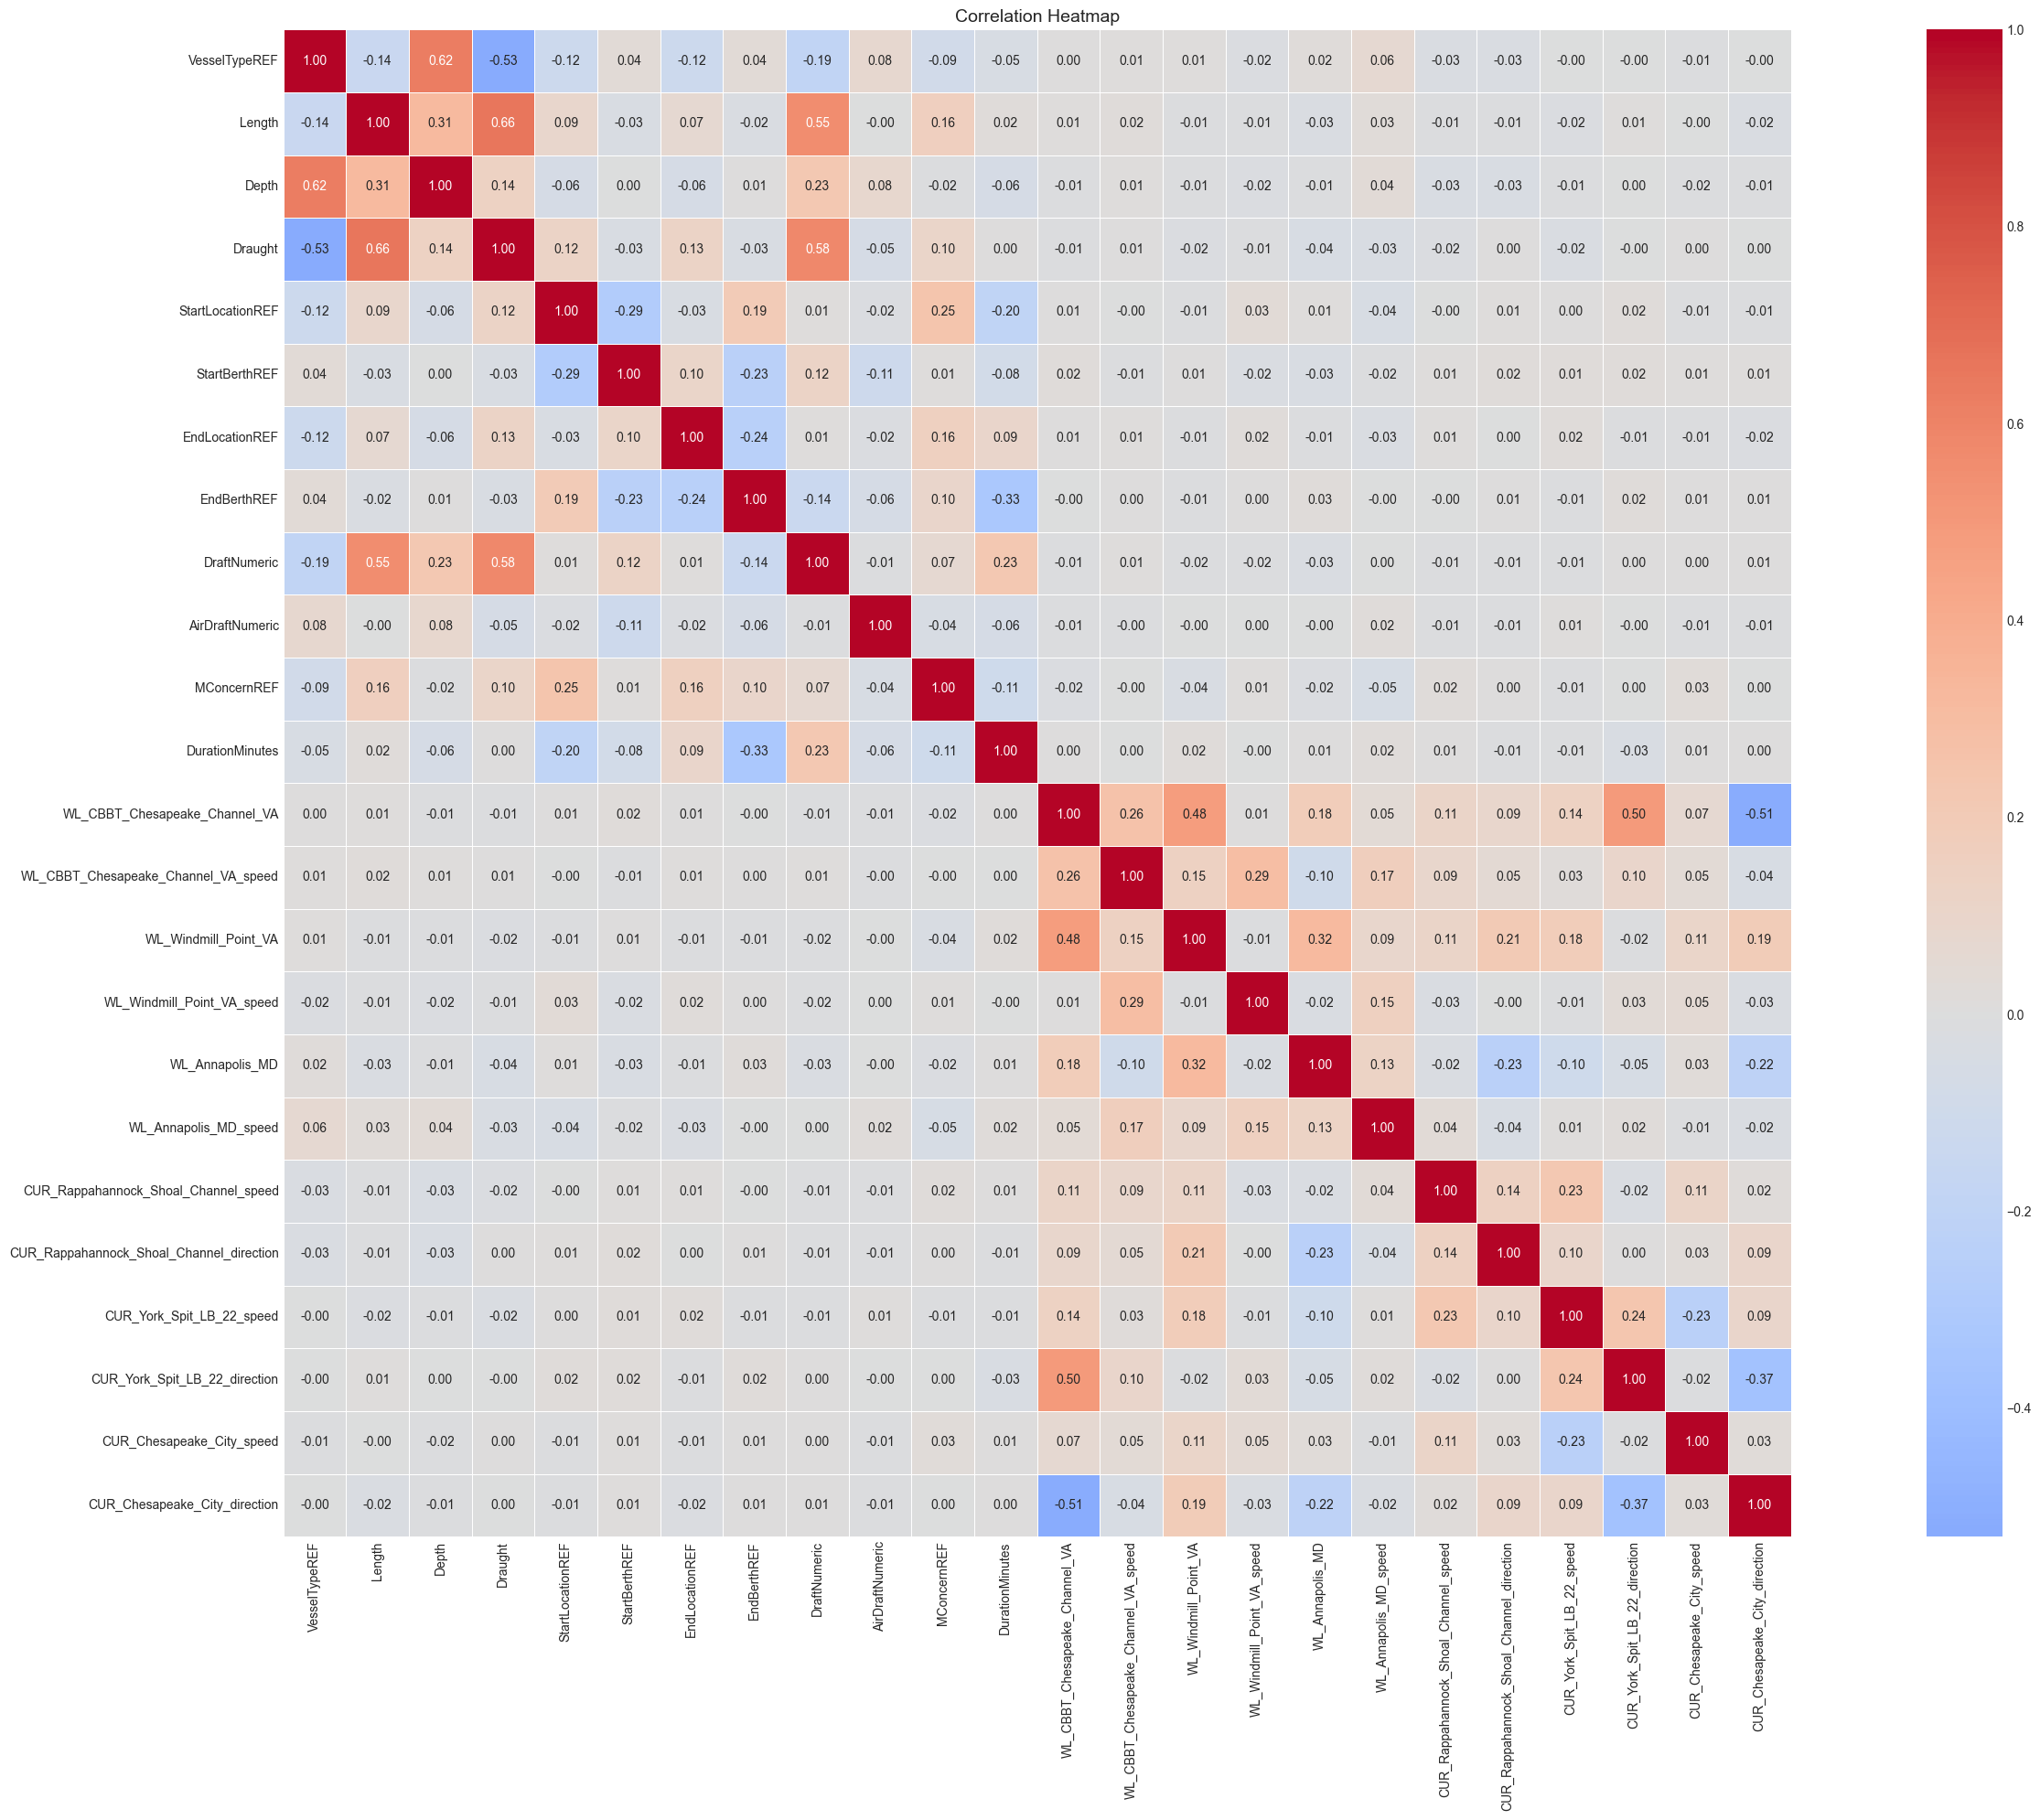

In [32]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 20))

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Red = positive, Blue = negative
            center=0,             # Center the colormap at 0
            fmt='.2f',            # 2 decimal places
            square=True,          # Make cells square
            linewidths=0.5)       # Add grid lines

plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

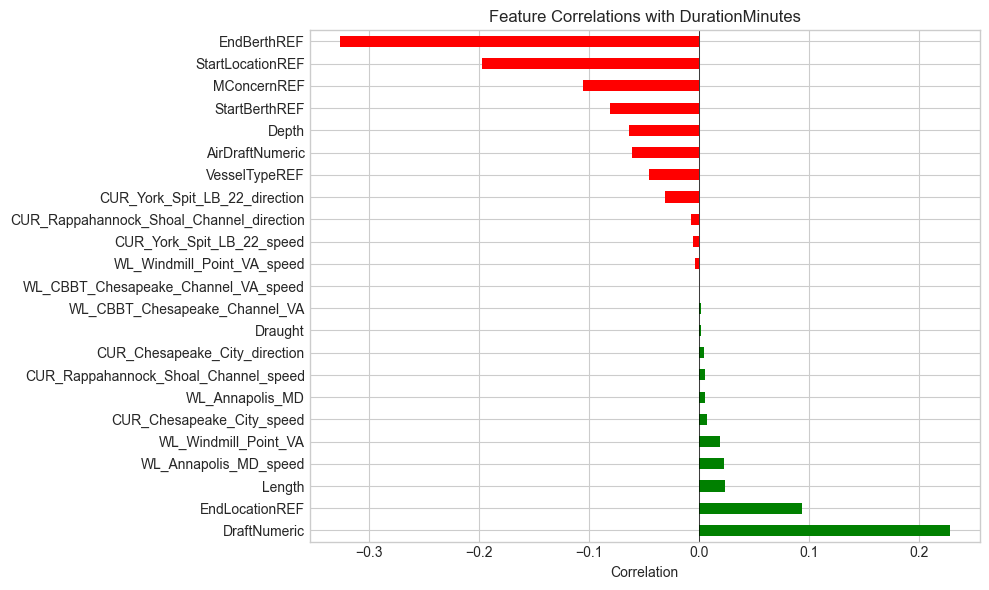

In [33]:
target_correlations = correlation_matrix[TARGET].drop(labels=[TARGET]).sort_values(ascending=False)
# Visualize correlations with target
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in target_correlations]
target_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation')
plt.title(f'Feature Correlations with {TARGET}')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

**What additional insights did you discover?**

Adding the NOAA weather data to our dataset provided additional context for understanding the environmental conditions during each flight. This allowed us to explore potential correlations between weather patterns and vessel performance, which could be valuable for predictive modeling. The null values in the NOAA data were minimal and did not significantly impact our analysis. Later we might consider removing rows with null values or imputing them if necessary.

### 4.7 EDA Insights Summary

*Summarize your key findings from the EDA.*

**Questions to answer:**
- Which features are most correlated with your target?
- Which categorical features show the biggest differences in target?
- Are there any features that seem unimportant?
- Did you discover any interesting patterns or relationships?
- Are there any concerns about the data (outliers, skewness, etc.)?

**Your summary:**
- Which features are most correlated with your target?
The features most correlated with the target (DurationMinutes) are primarily route-related variables such as EndBerthREF, StartLocationREF, StartBerthREF, and EndLocationREF. Among vessel characteristics, DraftNumeric shows the strongest relationship, indicating that vessel draft has some influence on transit duration.

- Which categorical features show the biggest differences in target?
The Direction variable shows the clearest separation in median duration across categories, making it one of the most influential categorical predictors. Route-related categorical features (berths and locations) also show meaningful differences.

- Are there any features that seem unimportant?
Some environmental variables display very low individual correlation with the target, suggesting limited standalone importance, although they may still contribute through interaction effects.

- Did you discover any interesting patterns or relationships?
There are clear patterns in the route-related features and the Direction variable, indicating that these factors play a significant role in the target variable.

- Are there any concerns about the data (outliers, skewness, etc.)?
Some plots show very large duration values (>1500 minutes), which could be considered outliers and may need to be addressed in the modeling process. Possible causes might be unusual operational delays.
In general data seems reasonably clean.

## Section 5: Data Cleaning

### 5.1 Decide What to Drop

Before cleaning, decide which columns to remove entirely.

In [34]:
# TODO: Create a copy of your dataframe for cleaning
#
# Why? We want to preserve the original data in case we need to go back.
# Never modify your original dataframe directly!
#
# Store in: df_clean

# YOUR CODE HERE:

df_clean = df.copy()

print(f"Starting shape: {df_clean.shape}")

Starting shape: (4774, 32)


In [35]:
# Identify columns to potentially drop
print("Columns to consider dropping:")
print("="*50)

# 1. High missing rate
high_missing = missing_df[missing_df['Missing %'] > 50].index.tolist()
print(f"\n1. >50% missing values: {high_missing}")

# 2. ID/index columns (no predictive value)
potential_ids = [col for col in df_clean.columns 
                 if 'id' in col.lower() or 'index' in col.lower() or 'url' in col.lower()]
print(f"\n2. Potential ID/URL columns: {potential_ids}")

# 3. High cardinality categorical (too many unique values)
high_cardinality = [col for col in categorical_cols if df_clean[col].nunique() > 100]
print(f"\n3. High cardinality (>100 unique): {high_cardinality}")

# 4. Low variance (same value in most rows)
low_variance = [col for col in df_clean.columns 
                if df_clean[col].value_counts(normalize=True).iloc[0] > 0.95]
print(f"\n4. Low variance (>95% same value): {low_variance}")

Columns to consider dropping:

1. >50% missing values: []

2. Potential ID/URL columns: []

3. High cardinality (>100 unique): ['StartDate', 'CompletionDate']

4. Low variance (>95% same value): ['WL_CBBT_Chesapeake_Channel_VA_flag', 'WL_Windmill_Point_VA_flag', 'WL_Annapolis_MD_flag']


In [36]:
# Drop columns
# TODO: Decide which columns to drop based on the analysis above
# IMPORTANT: Don't just copy all suggestions - think about each one!

columns_to_drop = [
    'StartDate', 'CompletionDate', 'StartDateUTC', # These columns are likely not needed for modeling
    'Length', 'Draught', # DraftNumeric should be a good representation of the vessel size
    'AirDraftNumeric', # to many 0 values, consistence with missing information
    'MConcernREF', # High cardinality and may not be predictive
    'WL_CBBT_Chesapeake_Channel_VA_flag', 'WL_Windmill_Point_VA_flag', 'WL_Annapolis_MD_flag' # Similar values, likely redundant
]

if columns_to_drop:
    df_clean = df_clean.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")
    print(f"New shape: {df_clean.shape}")
else:
    print("No columns dropped. Update the list above if needed.")

Dropped 10 columns: ['StartDate', 'CompletionDate', 'StartDateUTC', 'Length', 'Draught', 'AirDraftNumeric', 'MConcernREF', 'WL_CBBT_Chesapeake_Channel_VA_flag', 'WL_Windmill_Point_VA_flag', 'WL_Annapolis_MD_flag']
New shape: (4774, 22)


**Explain which columns you dropped and why:**

    'StartDate', 'CompletionDate', 'StartDateUTC' # These columns are likely not needed for modeling
    'Length', 'Draught', # DraftNumeric should be a good representation of the vessel size
    'AirDraftNumeric', # to many 0 values, consistence with missing information
    'MConcernREF', # High cardinality and may not be predictive
    'WL_CBBT_Chesapeake_Channel_VA_flag', 'WL_Windmill_Point_VA_flag', 'WL_Annapolis_MD_flag' # Similar values, likely redundant

### 5.2 Handle Duplicate Rows

In [37]:
# TODO: Remove duplicate rows from df_clean
#
# Steps:
# 1. Store the row count before: len(df_clean)
# 2. Use df_clean.drop_duplicates() to remove duplicates (assign back to df_clean)
# 3. Store the row count after
# 4. Print how many duplicates were removed

# YOUR CODE HERE:
row_count_before = len(df_clean)
df_clean = df_clean.drop_duplicates()
row_count_after = len(df_clean)
print(f"Removed {row_count_before - row_count_after} duplicate rows.")

Removed 0 duplicate rows.


### 5.3 Handle Missing Values

In [38]:
# Check missing values in cleaned dataframe
print("Missing values before handling:")
missing_now = df_clean.isnull().sum()
missing_now = missing_now[missing_now > 0].sort_values(ascending=False)
print(missing_now)

Missing values before handling:
CUR_Rappahannock_Shoal_Channel_speed        58
CUR_Rappahannock_Shoal_Channel_direction    58
CUR_Chesapeake_City_speed                   26
CUR_Chesapeake_City_direction               26
Propulsion                                  25
CUR_York_Spit_LB_22_speed                    4
CUR_York_Spit_LB_22_direction                4
dtype: int64


In [39]:
# Handle missing values
# TODO: Add your missing value handling code here
# 
# STRATEGIES:
# - Numerical columns: use median (robust to outliers) or mean
# - Categorical columns: use mode or 'Unknown'
# - Drop rows if missing target variable
#
# Examples:
# df_clean['column'] = df_clean['column'].fillna(df_clean['column'].median())
# df_clean['column'] = df_clean['column'].fillna('Unknown')
# df_clean = df_clean.dropna(subset=[TARGET])  # Don't predict with missing target!

# YOUR CODE HERE:
# % of missing values are very low, so I think we could remove rows with missing values without losing much data
df_clean_total_rows_before = len(df_clean)

df_clean = df_clean.dropna()

df_clean_total_rows_after = len(df_clean)

print(f"Removed {df_clean_total_rows_before - df_clean_total_rows_after} rows with missing values. New shape: {df_clean.shape}")

Removed 113 rows with missing values. New shape: (4661, 22)


In [40]:
# Verify missing values are handled
remaining_missing = df_clean.isnull().sum().sum()
print(f"Missing values after cleaning: {remaining_missing}")

if remaining_missing > 0:
    print("\n⚠️ Still have missing values in:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Missing values after cleaning: 0


**Explain your missing value strategy:**

[Describe what you did for each column and why]

### 5.4 Handle Outliers (if needed)

In [41]:
# Check for outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    return n_outliers, lower_bound, upper_bound

# Get current numerical columns
current_numerical = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print("Outlier analysis:")
print("="*60)
for col in current_numerical:
    n_outliers, lower, upper = find_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        pct = n_outliers / len(df_clean) * 100
        print(f"{col}: {n_outliers:,} outliers ({pct:.1f}%) | bounds: [{lower:.2f}, {upper:.2f}]")

Outlier analysis:
Depth: 4 outliers (0.1%) | bounds: [1.20, 42.80]
StartLocationREF: 651 outliers (14.0%) | bounds: [-0.50, 3.50]
StartBerthREF: 208 outliers (4.5%) | bounds: [-90.00, 150.00]
EndLocationREF: 682 outliers (14.6%) | bounds: [-0.50, 3.50]
EndBerthREF: 205 outliers (4.4%) | bounds: [-90.00, 150.00]
DraftNumeric: 279 outliers (6.0%) | bounds: [14.80, 44.66]
DurationMinutes: 10 outliers (0.2%) | bounds: [-255.00, 1225.00]
WL_CBBT_Chesapeake_Channel_VA_speed: 429 outliers (9.2%) | bounds: [-0.02, 0.09]
WL_Windmill_Point_VA: 35 outliers (0.8%) | bounds: [-0.11, 1.02]
WL_Windmill_Point_VA_speed: 168 outliers (3.6%) | bounds: [-0.00, 0.01]
WL_Annapolis_MD: 86 outliers (1.8%) | bounds: [-0.12, 0.99]
WL_Annapolis_MD_speed: 130 outliers (2.8%) | bounds: [-0.01, 0.02]
CUR_Rappahannock_Shoal_Channel_speed: 16 outliers (0.3%) | bounds: [-0.31, 1.11]
CUR_York_Spit_LB_22_speed: 57 outliers (1.2%) | bounds: [-0.44, 1.91]


In [42]:
# Handle outliers (if needed)
# TODO: Add your outlier handling code here if needed
#
# STRATEGIES:
# - Remove rows with outliers (be careful - losing data)
# - Cap/clip values at bounds
# - Keep them (if they're valid data points)
#
# Examples:
# df_clean = df_clean[df_clean['price'] > 0]  # Remove invalid prices
# df_clean = df_clean[df_clean['price'] < 500000]  # Remove extreme prices
# df_clean['column'] = df_clean['column'].clip(lower=0, upper=upper_bound)

# YOUR CODE HERE:

df_clean = df_clean[(df_clean['DurationMinutes'] < 1500) & (df_clean['DurationMinutes'] > 0)]
print(df_clean.shape)

(4658, 22)


In [43]:
# distinct StartLocationREF
distinct_start_locations = list(df_clean['StartLocationREF'])
print(f"Distinct StartLocationREF values: {distinct_start_locations}")

Distinct StartLocationREF values: [4, 2, 3, 2, 2, 2, 2, 1, 2, 4, 2, 3, 2, 1, 1, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 1, 2, 7, 3, 1, 1, 2, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 4, 2, 2, 1, 2, 2, 7, 2, 1, 1, 2, 1, 4, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 4, 4, 2, 1, 4, 1, 1, 1, 2, 2, 1, 1, 4, 1, 4, 1, 1, 1, 2, 4, 4, 2, 1, 2, 1, 1, 1, 1, 4, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 4, 1, 1, 2, 4, 3, 4, 2, 1, 1, 2, 2, 3, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 7, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 1, 3, 2, 2, 7, 1, 2, 4, 1, 1, 1, 2, 1, 1, 4, 1, 4, 2, 3, 2, 1, 2, 1, 2, 4, 2, 2, 1, 1, 2, 7, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 4, 2, 1, 2, 1, 2, 1, 4, 1, 1, 1, 2, 2, 1, 2, 4, 2, 2, 4, 2, 7, 1, 2, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 2, 3, 2, 4, 2, 2, 1, 1, 4, 2, 2, 2, 1, 2, 1, 3, 1, 1, 1, 2, 1, 4, 2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1,

**Explain your outlier handling strategy (or why you kept them):**

As we discovered during our exploratory data analysis, there were some extreme outliers in the `DurationMinutes` column. To handle these outliers, we decided to remove rows where `DurationMinutes` exceeded 1500 minutes, as these values were not representative of typical durations and could skew our analysis.

### 5.5 Data Type Corrections

In [44]:
# Check current data types
print("Current data types:")
print(df_clean.dtypes)

Current data types:
VesselTypeREF                                 int64
Propulsion                                   object
Depth                                       float64
StartLocationREF                              int64
StartBerthREF                                 int64
EndLocationREF                                int64
EndBerthREF                                   int64
DraftNumeric                                float64
Direction                                    object
DurationMinutes                               int64
WL_CBBT_Chesapeake_Channel_VA               float64
WL_CBBT_Chesapeake_Channel_VA_speed         float64
WL_Windmill_Point_VA                        float64
WL_Windmill_Point_VA_speed                  float64
WL_Annapolis_MD                             float64
WL_Annapolis_MD_speed                       float64
CUR_Rappahannock_Shoal_Channel_speed        float64
CUR_Rappahannock_Shoal_Channel_direction    float64
CUR_York_Spit_LB_22_speed                   

In [45]:
# Fix any data type issues
# TODO: Add your data type corrections here if needed
#
# Examples:
# df_clean['year'] = df_clean['year'].astype(int)
# df_clean['date_column'] = pd.to_datetime(df_clean['date_column'])
# df_clean['category'] = df_clean['category'].astype('category')

# YOUR CODE HERE:
df_clean['Propulsion'] = df_clean['Propulsion'].astype('category')
df_clean['Direction'] = df_clean['Direction'].astype('category')


## Section 6: Feature Engineering

Feature engineering is where you can really add value! The sections below cover common techniques, but feel free to go beyond these basics.

### 6.1 Create New Features (if applicable)

**Common feature engineering techniques:**
- **Ratios/interactions:** Combine existing features (e.g., price per square foot)
- **Log transforms:** Reduce skewness in highly skewed features
- **Binning:** Convert continuous variables to categories
- **Text features:** Extract length, word counts, etc. from text
- **Domain-specific:** Features that make sense for your specific problem

Think about what would help YOUR specific prediction problem!

In [46]:
# Create new features
# TODO: Add your feature engineering code here
#
# Examples:
# df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft']
# df_clean['log_price'] = np.log1p(df_clean['price'])
# df_clean['age'] = 2026 - df_clean['year']

# YOUR CODE HERE:
actual_trips = (
    df_clean[['StartLocationREF','EndLocationREF','StartBerthREF','EndBerthREF']]
    .drop_duplicates()
    .reset_index(drop=True)
)

actual_trips['RouteIndex'] = actual_trips.index

df_clean = df_clean.merge(
    actual_trips,
    on=['StartLocationREF','EndLocationREF','StartBerthREF','EndBerthREF'],
    how='left'
)

# drop columns that are no longer needed
columns_to_drop = ['StartLocationREF','EndLocationREF','StartBerthREF','EndBerthREF']
df_clean = df_clean.drop(columns=columns_to_drop)

RouteIndex
4      436
27     152
12     143
17     127
1      118
22     117
44     117
118     85
98      82
63      81
8       81
14      77
19      73
0       66
85      62
6       58
13      57
46      51
123     51
24      50
20      48
77      47
137     47
5       47
81      47
150     47
67      45
53      44
56      44
25      42
Name: count, dtype: int64


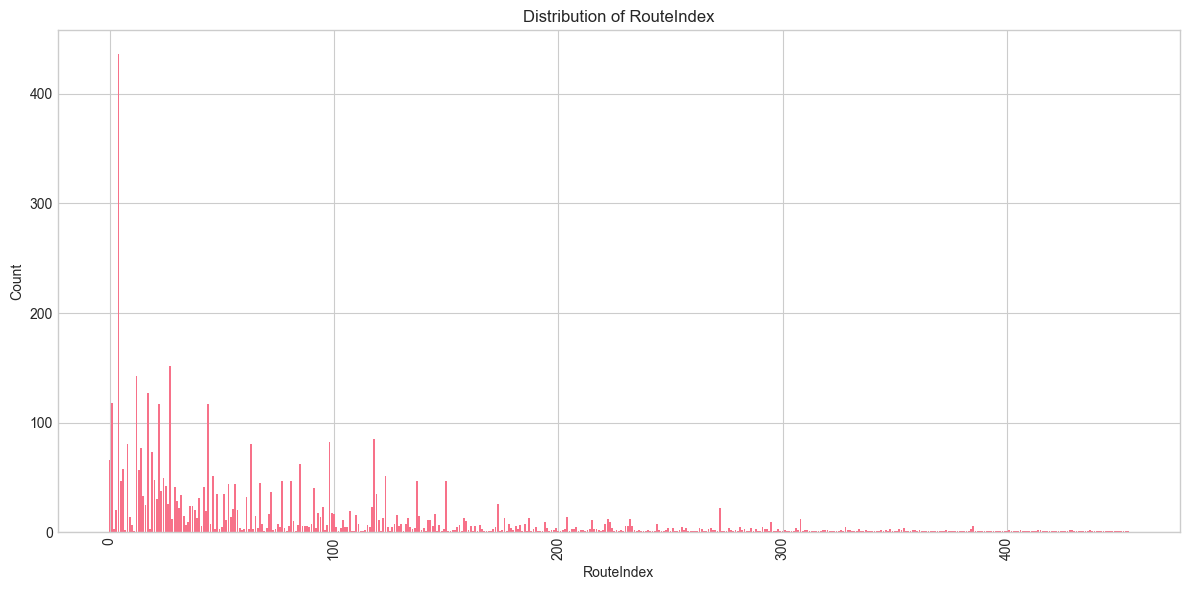

In [69]:
route_index_counts = df_clean['RouteIndex'].value_counts()

print(route_index_counts.head(30))

# show a bar chart of route_index_counts
plt.figure(figsize=(12, 6))
plt.bar(route_index_counts.index, route_index_counts.values)
plt.xlabel('RouteIndex')
plt.ylabel('Count')
plt.title('Distribution of RouteIndex')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Explain your new features:**

As a route is defined by its start and end locations and berths, we created a new feature called `RouteIndex` to uniquely identify each route. After analyzing the data, this idea seemed promising as it allows us to capture route-specific characteristics that could influence the duration of trips. It also helps us removing the route columns from the dataset, reducing redundancy and simplifying the data structure.

### 6.2 Encode Categorical Variables

In [48]:
# TODO: Identify categorical columns that need encoding
#
# Steps:
# 1. Get categorical columns using select_dtypes(include=['object', 'category'])
# 2. For each column, print:
#    - Column name
#    - Number of unique values: .nunique()
#    - Recommendation: "one-hot encoding" if <= 10 unique, else "consider label encoding or dropping"
#
# Store in: cat_cols

# YOUR CODE HERE:
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df_clean[col].nunique()}")
    if df_clean[col].nunique() <= 10:
        print("Recommendation: one-hot encoding")
    else:
        print("Recommendation: consider label encoding or dropping")
    print()

cat_cols = categorical_cols

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df_clean[col].nunique()}")
    print(f"Top 10 value counts:\n{df_clean[col].value_counts().head(10)}")
    
    
    

Column: Propulsion
Number of unique values: 8
Recommendation: one-hot encoding

Column: Direction
Number of unique values: 6
Recommendation: one-hot encoding


Column: Propulsion
Number of unique values: 8
Top 10 value counts:
Propulsion
Oil Engine(s) Direct Drive       4032
Oil Engine(s) Geared Drive        343
Oil Engine(s) Electric Drive      257
Sail Aux Oil Eng(s) Geared         11
Steam Turbine(s) Geared Drive       8
Sail Aux Oil Eng(s) Direct-Dr       3
Gas Turbine(s) Geared Drive         2
Oil Engines Elec. & Geared Dr       2
Name: count, dtype: int64

Column: Direction
Number of unique values: 6
Top 10 value counts:
Direction
NORTH       1669
SOUTH       1641
TRANSFER     553
SHIFT        434
EAST         185
WEST         176
Name: count, dtype: int64


In [49]:
# Encode categorical variables
# TODO: Add your encoding code here
#
# STRATEGIES:
# - One-hot encoding: for low cardinality (< 10 unique values)
# - Label encoding: for ordinal data or high cardinality
# - Target encoding: advanced technique (be careful of data leakage)
#
# Examples:
# One-hot encoding:
# df_clean = pd.get_dummies(df_clean, columns=['category_col'], drop_first=True)
#
# Label encoding:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_clean['encoded_col'] = le.fit_transform(df_clean['category_col'])

# YOUR CODE HERE:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_clean['VesselTypeREF_encoded'] = le.fit_transform(df_clean['VesselTypeREF'])
df_clean['Propulsion_encoded'] = le.fit_transform(df_clean['Propulsion'])
df_clean['Direction_encoded'] = le.fit_transform(df_clean['Direction'])

# remove original columns
df_clean = df_clean.drop(['VesselTypeREF', 'Propulsion', 'Direction'], axis=1)

In [50]:
df_clean.head()

,Depth,DraftNumeric,DurationMinutes,WL_CBBT_Chesapeake_Channel_VA,WL_CBBT_Chesapeake_Channel_VA_speed,WL_Windmill_Point_VA,WL_Windmill_Point_VA_speed,WL_Annapolis_MD,WL_Annapolis_MD_speed,CUR_Rappahannock_Shoal_Channel_speed,CUR_Rappahannock_Shoal_Channel_direction,CUR_York_Spit_LB_22_speed,CUR_York_Spit_LB_22_direction,CUR_Chesapeake_City_speed,CUR_Chesapeake_City_direction,RouteIndex,VesselTypeREF_encoded,Propulsion_encoded,Direction_encoded
0,21.30,29.91667,139,0.717,0.021,0.424,0.004,0.349,0.007,0.313,318.0,1.530,351.0,0.511,91.0,0,3,1,4
1,24.80,31.16667,612,0.597,0.024,0.452,0.003,0.320,0.004,0.500,346.0,1.322,356.0,0.076,96.0,1,6,1,1
2,13.30,31.49606,323,0.367,0.028,0.319,0.003,0.506,0.004,0.148,180.0,0.330,122.0,0.426,270.0,2,11,3,5
3,13.30,27.88714,756,0.367,0.028,0.319,0.003,0.506,0.004,0.148,180.0,0.334,135.0,0.332,274.0,3,11,3,1
4,32.09,27.23097,484,0.503,0.032,0.306,0.001,0.538,0.002,0.301,167.0,0.301,144.0,0.136,109.0,4,21,1,1


**Explain your encoding strategy:**

I decided to use LabelEncoder for the 'Propulsion', 'VesselTypeREF' and 'Direction' columns because they are categorical with a limited number of unique values.

### 6.3 Additional Feature Engineering (Your Choice!)

Every dataset has unique opportunities for feature engineering. What else makes sense for YOUR data?

**Think about:**
- What domain knowledge can you apply?
- Are there any feature interactions that might be predictive?
- Can you create meaningful groups or categories?
- Would polynomial features help capture non-linear relationships?

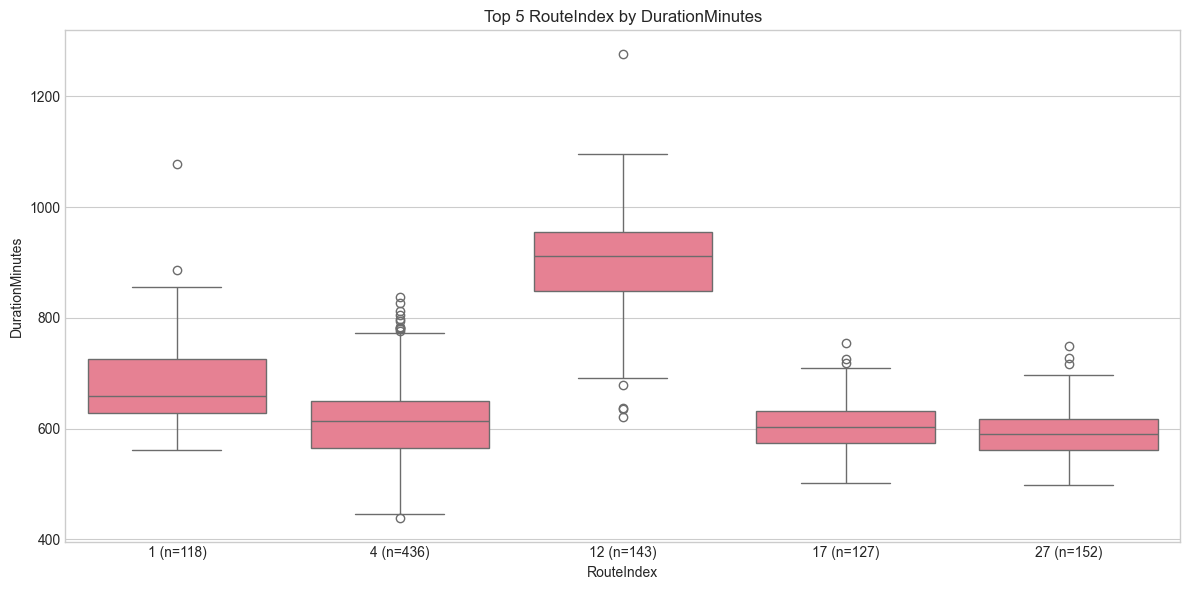

In [51]:
# YOUR ADDITIONAL FEATURE ENGINEERING CODE HERE
# Add as many cells as you need!


# get top 5 trip indices
top_5_trip_indices = df_clean['RouteIndex'].value_counts().nlargest(5).index
df_sample = df_clean[df_clean['RouteIndex'].isin(top_5_trip_indices)]

# precompute counts
counts = df_sample['RouteIndex'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='RouteIndex', y='DurationMinutes', data=df_sample)

# update x-axis labels with counts
new_labels = [
    f"{tick.get_text()} (n={counts[int(tick.get_text())]})"
    for tick in ax.get_xticklabels()
]
ax.set_xticklabels(new_labels)

plt.title('Top 5 RouteIndex by DurationMinutes')
plt.tight_layout()
plt.show()


Shape of route index 1 data: (118, 19)


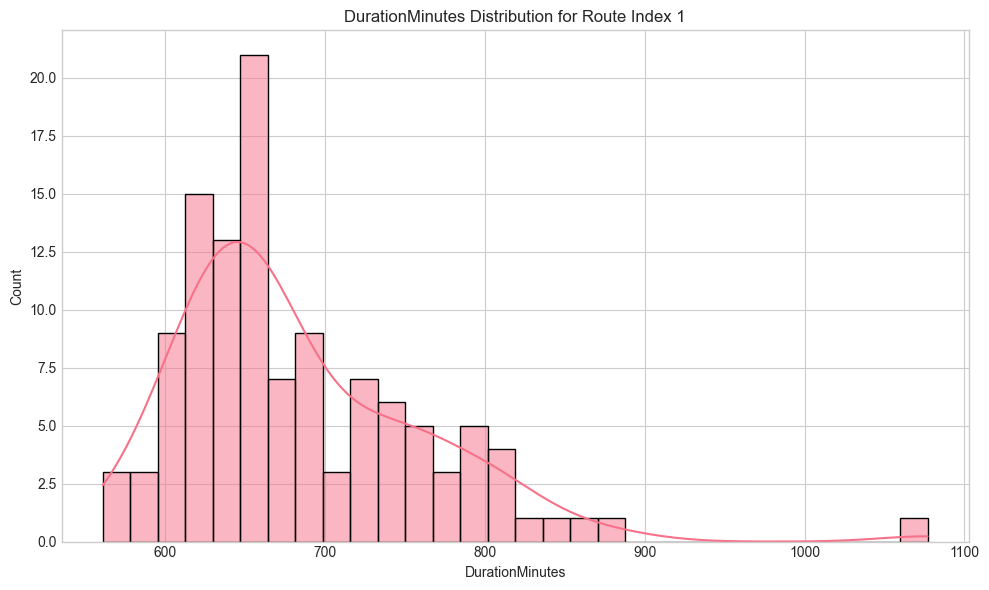

In [52]:
# get all trips with trip index 1
df_trip_1 = df_clean[df_clean['RouteIndex'] == 1]
print(f"Shape of route index 1 data: {df_trip_1.shape}")

# show bar plot of DurationMinutes for route index 1
plt.figure(figsize=(10, 6))
sns.histplot(df_trip_1['DurationMinutes'], bins=30, kde=True)
plt.title('DurationMinutes Distribution for Route Index 1')
plt.tight_layout()
plt.show()

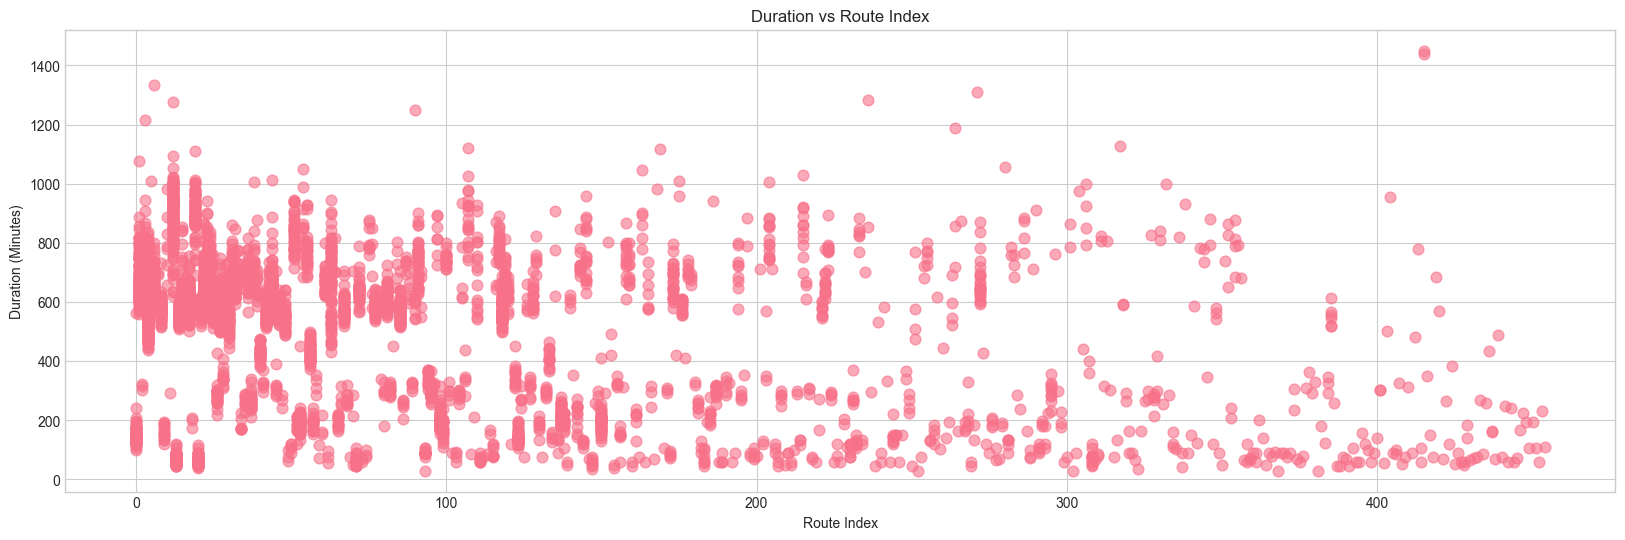

In [53]:
plt.figure(figsize=(20, 6))

# Scatter plot of all data points
plt.scatter(df_clean['RouteIndex'], df_clean['DurationMinutes'], alpha=0.6, s=60)

plt.xlabel('Route Index')
plt.ylabel('Duration (Minutes)')
plt.title('Duration vs Route Index')
plt.legend()
plt.show()

**Explain your additional feature engineering:**

We did not create any additional features. However, I added some visualizations to better understand the relationship between the route index and the duration of each route. Once again, route index appears to have a strong influence on the duration, which is consistent with our expectations.

### 6.4 Feature Scaling (Preparation)

We'll do actual scaling in the modeling notebook, but let's check which features might need it.

In [54]:
# TODO: Identify numerical features and check their ranges
#
# Steps:
# 1. Get numerical columns from df_clean (excluding TARGET)
# 2. For each column, print the min, max, and range
#
# This helps you understand if features need scaling (different scales = need scaling)
#
# Store in: numerical_features

# YOUR CODE HERE:
numerical_features = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove(TARGET)  # Exclude the target column

for col in numerical_features:
    min_val = df_clean[col].min()
    max_val = df_clean[col].max()
    print(f"{col}: min={min_val}, max={max_val}, range={max_val - min_val}")

Depth: min=0.0, max=40.4, range=40.4
DraftNumeric: min=12.0, max=47.507, range=35.507
WL_CBBT_Chesapeake_Channel_VA: min=-0.287, max=1.617, range=1.904
WL_CBBT_Chesapeake_Channel_VA_speed: min=0.0, max=0.315, range=0.315
WL_Windmill_Point_VA: min=-0.344, max=1.111, range=1.455
WL_Windmill_Point_VA_speed: min=0.0, max=0.037, range=0.037
WL_Annapolis_MD: min=-0.437, max=1.548, range=1.985
WL_Annapolis_MD_speed: min=0.0, max=0.17, range=0.17
CUR_Rappahannock_Shoal_Channel_speed: min=0.012, max=1.353, range=1.341
CUR_Rappahannock_Shoal_Channel_direction: min=0.0, max=360.0, range=360.0
CUR_York_Spit_LB_22_speed: min=0.006, max=2.618, range=2.612
CUR_York_Spit_LB_22_direction: min=0.0, max=360.0, range=360.0
CUR_Chesapeake_City_speed: min=0.002, max=3.141, range=3.1390000000000002
CUR_Chesapeake_City_direction: min=5.0, max=358.0, range=353.0
RouteIndex: min=0, max=454, range=454
VesselTypeREF_encoded: min=0, max=22, range=22


In [71]:
# show data where Depth =0
zero_depth_rows = df_clean[df_clean['Depth'] == 0] # Probably erroneous data so I will remove these rows
print(f'Number of rows with Depth = 0: {len(zero_depth_rows)}')

Number of rows with Depth = 0: 4


In [72]:
df_clean = df_clean[df_clean['Depth'] != 0]  # Remove rows where Depth is 0

### 6.5 Final Sanity Checks

In [73]:
# Final data quality checks before saving
print("="*60)
print("FINAL DATA QUALITY CHECKS")
print("="*60)

print(f"\n1. Shape: {df_clean.shape[0]:,} rows, {df_clean.shape[1]} columns")
print(f"   (Started with {df.shape[0]:,} rows, {df.shape[1]} columns)")

print(f"\n2. Missing values: {df_clean.isnull().sum().sum()}")

print(f"\n3. Duplicate rows: {df_clean.duplicated().sum()}")

print(f"\n4. Target variable '{TARGET}':")
print(f"   - Min: {df_clean[TARGET].min():.2f}")
print(f"   - Max: {df_clean[TARGET].max():.2f}")
print(f"   - Mean: {df_clean[TARGET].mean():.2f}")

# Check for data leakage red flags
print(f"\n5. Data types:")
print(f"   - Numerical: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical: {len(df_clean.select_dtypes(include=['object', 'category']).columns)}")

remaining_cats = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
if remaining_cats:
    print(f"\n⚠️ Still have categorical columns: {remaining_cats}")
    print("   Make sure these are encoded before modeling!")
else:
    print("\n✓ All features are numerical. Ready for modeling!")

FINAL DATA QUALITY CHECKS

1. Shape: 4,654 rows, 19 columns
   (Started with 4,774 rows, 32 columns)

2. Missing values: 0

3. Duplicate rows: 0

4. Target variable 'DurationMinutes':
   - Min: 30.00
   - Max: 1450.00
   - Mean: 520.71

5. Data types:
   - Numerical: 19
   - Categorical: 0

✓ All features are numerical. Ready for modeling!


### 6.6 Save Processed Data

In [74]:
# Final check of cleaned data
print("Final cleaned dataset:")
print(f"Shape: {df_clean.shape}")
print(f"\nColumns ({len(df_clean.columns)}):")
print(df_clean.columns.tolist())
print(f"\nData types:")
print(df_clean.dtypes)

Final cleaned dataset:
Shape: (4654, 19)

Columns (19):
['Depth', 'DraftNumeric', 'DurationMinutes', 'WL_CBBT_Chesapeake_Channel_VA', 'WL_CBBT_Chesapeake_Channel_VA_speed', 'WL_Windmill_Point_VA', 'WL_Windmill_Point_VA_speed', 'WL_Annapolis_MD', 'WL_Annapolis_MD_speed', 'CUR_Rappahannock_Shoal_Channel_speed', 'CUR_Rappahannock_Shoal_Channel_direction', 'CUR_York_Spit_LB_22_speed', 'CUR_York_Spit_LB_22_direction', 'CUR_Chesapeake_City_speed', 'CUR_Chesapeake_City_direction', 'RouteIndex', 'VesselTypeREF_encoded', 'Propulsion_encoded', 'Direction_encoded']

Data types:
Depth                                       float64
DraftNumeric                                float64
DurationMinutes                               int64
WL_CBBT_Chesapeake_Channel_VA               float64
WL_CBBT_Chesapeake_Channel_VA_speed         float64
WL_Windmill_Point_VA                        float64
WL_Windmill_Point_VA_speed                  float64
WL_Annapolis_MD                             float64
WL_Annapol

In [75]:
# Save cleaned data
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False)
print("✓ Cleaned data saved to ../data/processed/cleaned_data.csv")

✓ Cleaned data saved to ../data/processed/cleaned_data.csv


### 6.7 Feature Engineering Summary

*Summarize all the data cleaning and feature engineering you performed.*

**Checklist:**
- [ ] Columns dropped (with justification)
- [ ] Duplicate rows removed
- [ ] Missing values handled
- [ ] Outliers addressed (or documented why not)
- [ ] Data types corrected
- [ ] New features created (if applicable)
- [ ] Categorical variables encoded
- [ ] Data saved to processed folder

**Summary of changes:**
- Columns dropped:
    'StartDate', 'CompletionDate', 'StartDateUTC', # These columns are likely not needed for modeling as they are timestamps
    'WL_CBBT_Chesapeake_Channel_VA_flag', 'WL_Windmill_Point_VA_flag', 'WL_Annapolis_MD_flag' # Had similar values, likely redundant
    'StartLocationREF','EndLocationREF','StartBerthREF','EndBerthREF' # we replaced with RouteIndex
    'Propulsion', 'Direction' # we encoded these as categorical variables

- None duplicate rows found.
- Handled missing values:
    We removed rows with missing values as the % of missing data was small
    Also removed rows where Length or Depth was 0, as these were likely erroneous.

- Outliers addressed:
    we decided to remove rows where `DurationMinutes` exceeded 1500 minutes, as these values were not representative of typical durations and could skew our analysis.

- Data types corrected:
    None 

- New features created

- New features created:
    - RouteIndex: A unique identifier for each route based on start and end locations.

- Categorical variables encoded
    We encoded the `Propulsion` and `Direction` columns as categorical variables.

We those changes have prepared the dataset for modeling by ensuring that it is clean, consistent, and contains relevant features.


**Final feature list for modeling:**

[List all the features you'll use in your models]

VesselTypeREF
Length
Depth
Draught
DraftNumeric
AirDraftNumeric
MConcernREF
DurationMinutes
WL_CBBT_Chesapeake_Channel_VA
WL_CBBT_Chesapeake_Channel_VA_speed
WL_Windmill_Point_VA
WL_Windmill_Point_VA_speed
WL_Annapolis_MD
WL_Annapolis_MD_speed
CUR_Rappahannock_Shoal_Channel_speed
CUR_Rappahannock_Shoal_Channel_direction
CUR_York_Spit_LB_22_speed
CUR_York_Spit_LB_22_direction
CUR_Chesapeake_City_speed
CUR_Chesapeake_City_direction
RouteIndex
Propulsion_encoded
Direction_encoded

---

## ✅ Checkpoint 2 Submission Instructions

**Congratulations!** You've completed Checkpoint 2 (EDA, Data Cleaning, and Feature Engineering).

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub

```bash
# Stage your changes
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/processed/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 2: EDA, data cleaning, and feature engineering"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 2 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

You're ready to move on to **Notebook 02: Regression Model**!

In that notebook, you'll:
1. Load your cleaned data
2. Split into train/test sets
3. Build and evaluate regression models
4. Save your best model

---